In [27]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from topoflow.components import infil_richards_1D

In [28]:
cfg_file='topoflow/examples/Treynor_Iowa/June_20_67_infil_richards_1d.cfg'
m=infil_richards_1D.infil_component()

In [29]:
# similar to green_ampt componetn
# will not run without these
m.P_rain=100.5
m.SM=1000
m.h_table=1
# reques more input than other two infil methods
m.n_layers=3
m.save_grid_dt=60
m.dt=60
m.save_pixels_dt=60
m.save_profile_dt=60
m.save_cube_dt=60
m.ET=100
# need these for update to work
m.elev=0.0
m.initialize(cfg_file);
m.get_current_time()


 
Infiltration component: Initializing...
Suggested initial values for layer 1 :
   For theta_r = 0.081525
   theta_i = 0.375807613989    vs. 0.375808
   K_i     = 9.84970140132e-08 vs. 9.85e-08
   theta_H = 0.212084935691   vs. 0.081525  (theta_r)
 
Suggested initial values for layer 2 :
   For theta_r = 0.071217
   theta_i = 0.328763873192    vs. 0.328764
   K_i     = 3.2929661833e-08 vs. 3.29e-08
   theta_H = 0.185430150315   vs. 0.071217  (theta_r)
 
Suggested initial values for layer 3 :
   For theta_r = 0.152958
   theta_i = 0.412771750084    vs. 0.4128
   K_i     = 3.11491725259e-08 vs. 3.11e-08
   theta_H = 0.308981598549   vs. 0.152958  (theta_r)
 
Imported netCDF4 version: 1.1.9


array(0.0)

In [30]:
time = [m.get_current_time().copy()]
# NOTE: EMELI does not have get_value
vol_IN = [m.get_values('soil_surface_water__domain_time_integral_of_infiltration_volume_flux').copy()]
vol_Rg = [m.get_values('soil_water_sat-zone_top__domain_time_integral_of_recharge_volume_flux').copy()]
Rg = [m.get_values('soil_water_sat-zone_top__recharge_volume_flux').copy()]

while m.get_current_time() < m.get_end_time():
    print m.get_current_time(), m.get_end_time()
    m.update()
    time.append(m.get_current_time().copy())
    vol_IN.append(m.vol_IN.copy())
    vol_Rg.append(m.vol_Rg.copy())
    Rg.append(m.Rg.copy())    

print np.shape(vol_IN), np.shape(Rg), np.shape(vol_Rg)

0.0 60.0
##############################################
ERROR:  Aborting model run.
        NaNs found in infiltration rates.
        Number of NaN values = 1
##############################################
 
6.0 60.0
##############################################
ERROR:  Aborting model run.
        NaNs found in infiltration rates.
        Number of NaN values = 1
##############################################
 
12.0 60.0
##############################################
ERROR:  Aborting model run.
        NaNs found in infiltration rates.
        Number of NaN values = 1
##############################################
 
18.0 60.0
##############################################
ERROR:  Aborting model run.
        NaNs found in infiltration rates.
        Number of NaN values = 1
##############################################
 
24.0 60.0
##############################################
ERROR:  Aborting model run.
        NaNs found in infiltration rates.
        Number of NaN values = 1
######

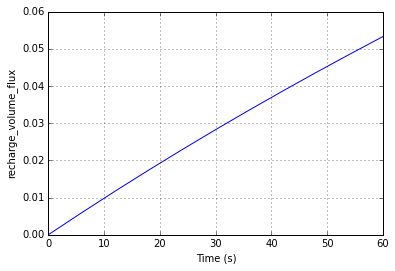

In [31]:
plt.plot(time,vol_Rg,'b'); 
plt.xlabel('Time (s)')
plt.ylabel('recharge_volume_flux')
#plt.title('Snow Melt rate vs. time')
plt.grid(); plt.show()